In [1]:
import numpy as np

In [25]:
# Generate Training data
from scipy.stats import multivariate_normal
def X_data_generation(r, samples, features):
    a = np.zeros((features, features))
    b = a.copy()
    
    for i in range(features):
        a[i, :] = i + 1
    
    for j in range(features):
        b[:, j] = j + 1
    
    dc = r**np.abs(a - b)
    mean_vector = np.zeros(dc.shape[0])
    X = multivariate_normal.rvs(mean=mean_vector, cov=dc, size=samples)
    
    return X

def beta_initiate(features):
    s = np.concatenate((np.linspace(1, 2.9, features), np.linspace(-2.9, -1, features)))
    theta = np.matrix(np.random.choice(s, size=features)).T
    theta[4, 0] = 1.1
    
    return theta

def Y_data_generation(X, beta):
    ebr = np.random.normal(0, 1, size=(X.shape[0],1))
    Y = X@beta + ebr
    return Y

In [188]:
# generate training data
r = 0.5
samples = 10
features = 20

X = X_data_generation(r, samples, features)
init_beta = beta_initiate(features)
y = Y_data_generation(X, init_beta)

In [189]:
init_beta.shape,X.shape,y.shape

((20, 1), (10, 20), (10, 1))

In [190]:

class LassoReg():
    def __init__(self,X,intercept=True,lam = 10**np.linspace(-6, 3, num=300, endpoint=True)):
        self.p = X.shape[1]
        self.n = X.shape[0]
        self.intercept = intercept
        self.lam = lam
        
    def design_matrix(self,X,y):
        if self.intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack([ones, X])
        y = y.reshape((-1,1))
        return X,y
    
    def fit(self, X, y):
        X, y = self.design_matrix(X,y)
        self.beta_rec = np.zeros((len(self.lam),X.shape[1]))
        self.mse_rec = np.zeros((len(self.lam),1))
        for i, l in enumerate(self.lam):
            beta_hat = np.linalg.inv(X.T@X+ l*np.identity(self.p))@(X.T@y)
            y_hat = X@beta_hat
            mse = np.mean(np.power((y_hat-y),2))
            
            self.beta_rec[i,:] = beta_hat.reshape(len(beta_hat))
            self.mse_rec[i] = mse
        

In [191]:
Ls = LassoReg(X,intercept = False)
Ls.fit(X,y)

In [192]:
Ls.mse_rec

array([[3.24226712e-13],
       [3.74954656e-13],
       [4.26871827e-13],
       [4.91880144e-13],
       [5.69214878e-13],
       [6.50388201e-13],
       [7.40641513e-13],
       [8.52544964e-13],
       [9.83607851e-13],
       [1.13599963e-12],
       [1.29875987e-12],
       [1.48887995e-12],
       [1.70759705e-12],
       [1.97260808e-12],
       [2.26148422e-12],
       [2.59179144e-12],
       [2.98238294e-12],
       [3.42019902e-12],
       [3.93586750e-12],
       [4.52101428e-12],
       [5.19698492e-12],
       [5.96676373e-12],
       [6.85712832e-12],
       [7.86809601e-12],
       [9.04176318e-12],
       [1.03932805e-11],
       [1.19329791e-11],
       [1.37108149e-11],
       [1.57480463e-11],
       [1.80849787e-11],
       [2.07754975e-11],
       [2.38656103e-11],
       [2.74188900e-11],
       [3.14874506e-11],
       [3.61744869e-11],
       [4.15594657e-11],
       [4.77347757e-11],
       [5.48261127e-11],
       [6.29786477e-11],
       [7.23417322e-11],


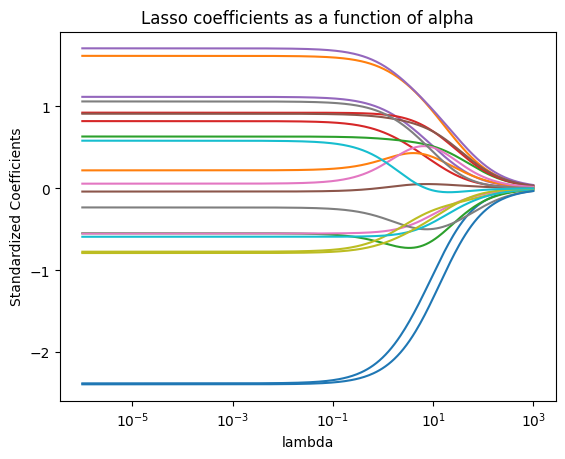

In [193]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(Ls.lam, Ls.beta_rec)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [207]:
lambd = 10**np.linspace(-9, 2, num=300, endpoint=True)
Ls = LassoReg(X,intercept = False,lam = lambd)
Ls.fit(X,y)

In [208]:
Ls.mse_rec

array([[5.75481620e-11],
       [2.87986595e-11],
       [2.34460713e-11],
       [2.93035070e-11],
       [3.16023627e-11],
       [5.94537056e-11],
       [7.40115708e-11],
       [6.12915629e-11],
       [1.86643822e-11],
       [5.49984446e-11],
       [9.39943921e-12],
       [2.63008180e-11],
       [8.65371626e-12],
       [9.26721449e-12],
       [1.98128063e-11],
       [4.94954614e-12],
       [8.18222196e-12],
       [4.52783074e-12],
       [3.38672267e-12],
       [2.90341629e-12],
       [5.61466426e-12],
       [3.04291234e-12],
       [3.06739577e-12],
       [3.50886652e-12],
       [1.30518701e-12],
       [8.14172838e-13],
       [8.96835899e-13],
       [1.72863669e-12],
       [6.91598332e-13],
       [8.80932520e-13],
       [2.67739599e-13],
       [1.10778915e-12],
       [4.86688386e-13],
       [4.20930441e-13],
       [4.30533977e-13],
       [3.98086258e-13],
       [1.22965502e-13],
       [2.23648668e-13],
       [5.26475253e-13],
       [4.47979365e-14],


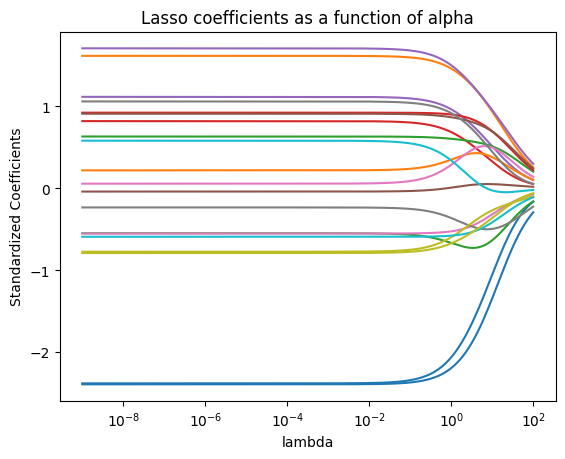

In [209]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(Ls.lam, Ls.beta_rec)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [210]:
# find the optimal coefficients
optIndex = np.argmin(Ls.mse_rec)
opt_beta = Ls.beta_rec[optIndex,:]
print("the best coeffcients:\n", opt_beta)
print("the optimal lambda:\n", Ls.lam[optIndex])

the best coeffcients:
 [-2.38180891  1.61717036 -0.54904228  0.82034132  1.11664186 -0.03988288
 -0.55276186 -0.23362404 -0.77417344 -0.59183668 -2.39352441  0.21907908
  0.63236725  0.92370236  1.70915478  0.91065484  0.05650418  1.06053999
 -0.79047753  0.58131346]
the optimal lambda:
 7.520629269592408e-08


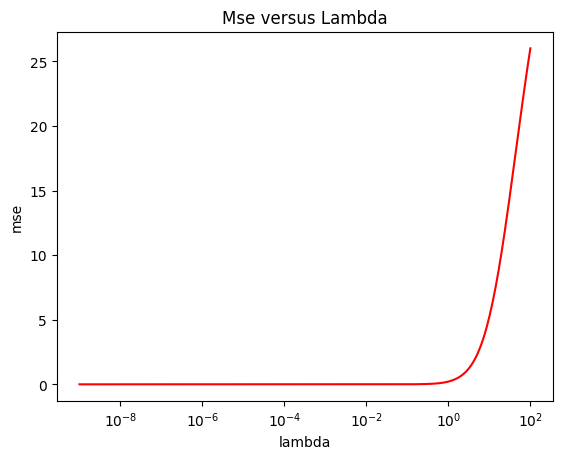

In [214]:
ax = plt.gca()
ax.set_xscale('log')
plt.plot(Ls.lam,Ls.mse_rec,c="red")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.title('Mse versus Lambda')
plt.show()